# REKHA MEENA
### DATA SCIENCE AND BUSINESS ANALYTICS INTERN
## @THE SPARKS FOUNDATION


## TASK-7 : Stock Market Prediction using Numerical and Textual Analysis

### Objective: Create a hybrid model for stock price/performance
- prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
- Stock to analyze and predict - SENSEX (S&P BSE SENSEX)


### historical stock prices dataset :  finance.yahoo.com
### textual (news) dataset :  https://bit.ly/36fFPI6


In [2]:
#importing the necessary libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor

C:\Users\HCL\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\HCL\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/d

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HCL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HCL\AppData\Roaming\nltk_data...


C:\Users\HCL\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
C:\Users\HCL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\HCL\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_bo

In [4]:
# Load the textual (news) dataset

df1 = pd.read_csv("india-news-headlines.csv")
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [6]:
df1.shape

(3424067, 3)

In [7]:
df1.isnull().sum()     ##Check for duplicated values of the first dataset

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [5]:
df1.describe()   ##summarize the statistics of the dataframe

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


In [8]:
df1.drop('headline_category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
df1.head(-5)

Showing part of the whole dataset:


,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic
...,...,...
3424057,20201231,50 NRIs reach Singhu; offer help to farmers
3424058,20201231,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,20201231,Azim Premji organisation's name misused to che...
3424060,20201231,Get govt nod to probe officials: MP to agencies


In [9]:
#removing unwanted characters from the news in the first dataset

df1.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
df1["headline_text"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1                  Fissures in Hurriyat over Pak visit
2                America's unwanted heading for India 
3                   For bigwigs  it is destination Goa
4                 Extra buses to clear tourist traffic
Name: headline_text, dtype: object

In [11]:
# Load the historical stock prices dataset

df2 = pd.read_csv("historical stock prices.csv")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-19,15.400000,16.389999,15.270000,15.790000,15.586724,286800
1,2020-05-20,17.360001,19.980000,17.299999,19.270000,19.021925,646800
2,2020-05-21,19.200001,19.219999,18.330000,18.600000,18.360552,267000
3,2020-05-22,18.730000,18.969999,18.230000,18.490000,18.251966,155600
4,2020-05-26,19.070000,19.290001,18.430000,18.459999,18.222351,148500


# Data exploration of the second dataset

In [14]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,27.732421,28.147183,27.307341,27.740556,27.568924,109966.269841
std,6.888645,6.916422,6.836770,6.866147,6.921592,68518.308348
min,15.400000,16.389999,15.270000,15.790000,15.586724,28800.000000
25%,21.892500,22.312500,21.440001,21.967500,21.769239,67175.000000
50%,27.615001,28.215000,27.214999,27.735000,27.534253,92350.000000
75%,34.645001,35.102501,34.047500,34.707501,34.572541,127675.000000
max,38.619999,39.209999,38.439999,38.639999,38.639999,646800.000000


In [15]:
df2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
df2["Date"]= pd.to_datetime(df2["Date"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [16]:
df2=df2[["Date","Open","High","Low","Close","Volume"]] #Analysing the information of the second dataset
df2.head(-5)

,Date,Open,High,Low,Close,Volume
0,2020-05-19,15.400000,16.389999,15.270000,15.790000,286800
1,2020-05-20,17.360001,19.980000,17.299999,19.270000,646800
2,2020-05-21,19.200001,19.219999,18.330000,18.600000,267000
3,2020-05-22,18.730000,18.969999,18.230000,18.490000,155600
4,2020-05-26,19.070000,19.290001,18.430000,18.459999,148500
...,...,...,...,...,...,...
242,2021-05-05,38.560001,38.790001,38.389999,38.619999,54900
243,2021-05-06,38.619999,38.750000,38.090000,38.529999,56200
244,2021-05-07,38.500000,39.209999,38.439999,38.639999,41800
245,2021-05-10,38.500000,38.619999,37.869999,37.869999,74500


# Analysis and visualisation of numerical data

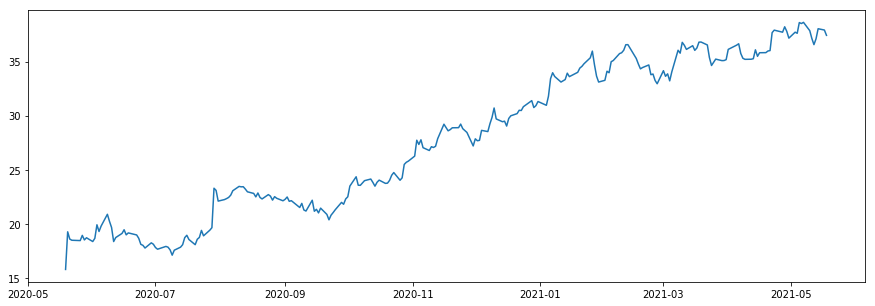

In [18]:
# Extract the dataframe and visualise the stock price with respect to time
df2['Date'] = pd.to_datetime(df2.Date,format='%Y-%m-%d')
df2.index = df2['Date']
df2.dropna(inplace=True)
#plot
plt.figure(figsize=(15,5))
plt.plot(df2['Close'], label='Close Price history')

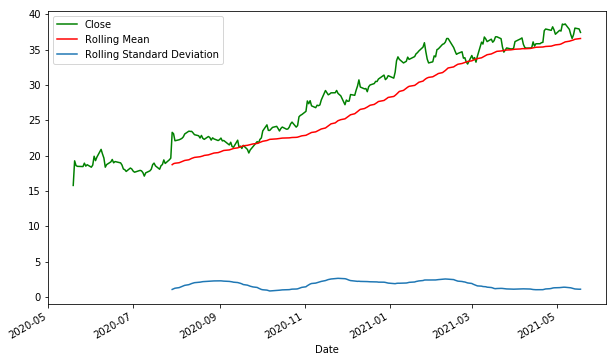

In [75]:
#Plotting moving average
close = df2['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df2['Close'].plot(color = 'g', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

# Making predictions of the numerical data

In [19]:
train = df1[:700]
valid = df1[700:]
train.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India
3,20010102,For bigwigs it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [21]:
# Analysis of Textual Data
#Text Analysis

columns = ['Date','Category','News']
news = pd.read_csv('india-news-headlines.csv', names = columns)
news

C:\Users\HCL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


In [22]:
news.drop(0, inplace=True)   ##Data preprocessing
news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 78.4+ MB


In [23]:
# Restructuring the date format
news['Date'] = pd.to_datetime(news['Date'],format= '%Y %m %d')
news

,Date,News
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic
...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...


# Visualisation of textual data

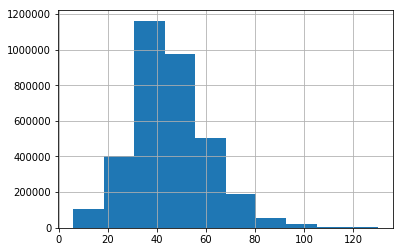

<Figure size 720x288 with 0 Axes>

In [24]:
news['News'].str.len().hist()
plt.figure(figsize=(10,4))
plt.show()

# Addition of subjectivity and polarity scores

In [26]:
!pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


In [27]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer   ##Libraries necessary for sentiment analysis

from textblob import TextBlob

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [28]:
news['Subjectivity'] = news['News'].apply(getSubjectivity) ##Adding subjectivity score

news['Polarity'] = news['News'].apply(getPolarity) ##Adding polarity scores

news

,Date,News,Subjectivity,Polarity
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000000
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit,0.000000,0.000000
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?,0.000000,0.000000
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa,0.000000,0.000000
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic,0.241667,0.050000
...,...,...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...,0.000000,0.000000


# Visualisation of polarity scores

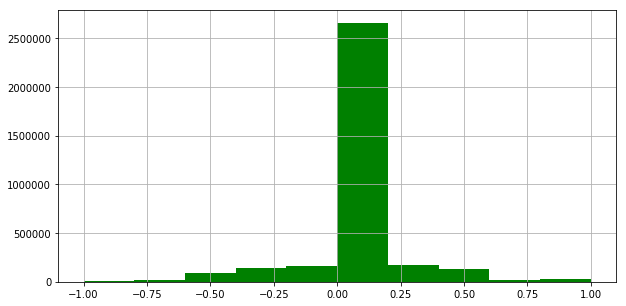

In [29]:
plt.figure(figsize = (10,5))
news['Polarity'].hist(color = 'green')

# Visualization of Subjectivity Scores

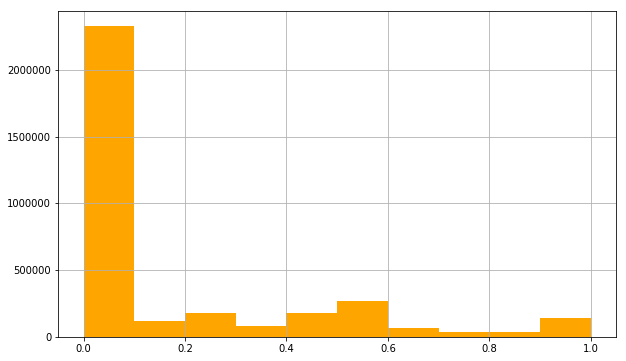

In [30]:
plt.figure(figsize = (10,6))
news['Subjectivity'].hist(color = 'orange')

In [32]:
# Performing Sentiment Analysis over the news Headlines

sia = SentimentIntensityAnalyzer()  ##Adding sentiment score to news

news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']] ##Adding sentiment score to news

news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']] ##Adding sentiment score to news

news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']] ##Adding sentiment score to news

news   ##Information of the dataframe showing subjectivity, polarity and sentiment score of news

,Date,News,Subjectivity,Polarity,Negative,Neutral,Positive
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000000,0.000,0.805,0.195
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.000,1.000,0.000
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?,0.000000,0.000000,0.322,0.678,0.000
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa,0.000000,0.000000,0.000,1.000,0.000
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...,0.000000,0.000000,0.000,0.857,0.143


# Merging numerical and textual data to create a hybrid model

In [33]:
merge = news  ## Merging numerical and textual data to create a hybrid model
merge

,Date,News,Subjectivity,Polarity,Negative,Neutral,Positive
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000000,0.000,0.805,0.195
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.000,1.000,0.000
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?,0.000000,0.000000,0.322,0.678,0.000
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa,0.000000,0.000000,0.000,1.000,0.000
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...,0.000000,0.000000,0.000,0.857,0.143


# Create a dataset for model training

In [34]:
clf = merge[['Subjectivity', 'Polarity',  'Negative', 'Neutral' ,'Positive']]  ##Dataset for the purpose of model training
clf

,Subjectivity,Polarity,Negative,Neutral,Positive
1,0.000000,0.000000,0.000,0.805,0.195
2,0.000000,0.000000,0.000,1.000,0.000
3,0.000000,0.000000,0.322,0.678,0.000
4,0.000000,0.000000,0.000,1.000,0.000
5,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...
3424063,0.500000,0.500000,0.000,0.859,0.141
3424064,0.500000,0.500000,0.000,0.859,0.141
3424065,0.500000,0.500000,0.000,0.859,0.141
3424066,0.000000,0.000000,0.000,0.857,0.143


# Normalize the data

In [35]:
from sklearn.preprocessing import MinMaxScaler   ##Import the necessary libraries

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(clf))

df.columns = clf.columns
df.index = clf.index
df.head()    ##Printing the top 5 rows for observation purpose

,Subjectivity,Polarity,Negative,Neutral,Positive
1,0.000000,0.500,0.000,0.805,0.195
2,0.000000,0.500,0.000,1.000,0.000
3,0.000000,0.500,0.322,0.678,0.000
4,0.000000,0.500,0.000,1.000,0.000
5,0.241667,0.525,0.000,0.658,0.342


In [45]:
df.shape

(3424067, 5)

In [67]:
X = df[: 1712033]
X.head()

,Subjectivity,Polarity,Negative,Neutral,Positive
1,0.000000,0.500,0.000,0.805,0.195
2,0.000000,0.500,0.000,1.000,0.000
3,0.000000,0.500,0.322,0.678,0.000
4,0.000000,0.500,0.000,1.000,0.000
5,0.241667,0.525,0.000,0.658,0.342


In [68]:
Y = df[1712034 :]
Y.head()

,Subjectivity,Polarity,Negative,Neutral,Positive
1712035,0.000000,0.50,0.000,1.000,0.000
1712036,0.416667,0.50,0.198,0.541,0.261
1712037,0.700000,0.25,0.500,0.500,0.000
1712038,0.000000,0.50,0.093,0.698,0.209
1712039,0.000000,0.50,0.474,0.526,0.000


# Split the dataset into training and test data

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

x_train[:10]

,Subjectivity,Polarity,Negative,Neutral,Positive
315689,0.500000,0.750000,0.000,0.741,0.259
1438618,0.833333,0.305556,0.122,0.878,0.000
1178046,0.000000,0.400000,0.360,0.640,0.000
323829,0.000000,0.500000,0.000,1.000,0.000
561130,0.000000,0.500000,0.000,1.000,0.000
1458433,0.000000,0.500000,0.406,0.594,0.000
787744,0.000000,0.500000,0.000,1.000,0.000
115152,0.750000,0.650000,0.000,0.469,0.531
1564971,0.541667,0.354167,0.474,0.526,0.000
71444,0.250000,0.625000,0.000,1.000,0.000


# Implementation Of RandomForestRegressor on the model

In [70]:
rf = RandomForestRegressor()   ##Implementing the random forest regressor model

rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

print(prediction[:10])
print(y_test[:10])

C:\Users\HCL\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[[0.16962243 0.51399972 0.11210107 0.81108689 0.07681235]
 [0.10769841 0.46543651 0.17325    0.80973333 0.01701667]
 [0.18571189 0.50811688 0.12339689 0.81759352 0.059008  ]
 [0.29935897 0.65801282 0.06060128 0.74602179 0.19337692]
 [0.19419048 0.5680878  0.02178714 0.93839381 0.03981905]
 [0.16962243 0.51399972 0.11210107 0.81108689 0.07681235]
 [0.17097863 0.51474977 0.11098317 0.81472168 0.07429407]
 [0.16962243 0.51399972 0.11210107 0.81108689 0.07681235]
 [0.16962243 0.51399972 0.11210107 0.81108689 0.07681235]
 [0.28488456 0.59588745 0.1363     0.74574683 0.11771905]]
         Subjectivity  Polarity  Negative  Neutral  Positive
2915467           0.0     0.500     0.000    1.000     0.000
2732110           0.0     0.500     0.359    0.641     0.000
3215700           0.0     0.500     0.000    0.645     0.355
2686306           0.4     0.500     0.291    0.709     0.000
3118008           0.0     0.500     0.224    0.776     0.000
1753510           0.0     0.500     0.000    1.000   

In [71]:
print('Mean Squared error: ',mean_squared_error(prediction,y_test)) ##Calculating the mean squared error of RandomForestRegressor Model

Mean Squared error:  0.037060686210108065


# Observation :
So, we can observe that the mean squared error generated from the RandomForestRegressor Model is 0.0.0370(app.)

# Implemenation of DecisionTreeRegressor on the Model

In [72]:
from sklearn.tree import DecisionTreeRegressor   ##Implementing the DecisionTreeRegressor Model

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

predictions = dtr.predict(x_test)
print(predictions[:10])

[[0.16973294 0.5139644  0.11222816 0.81084576 0.07692643]
 [0.5        0.5        0.095      0.7895     0.1155    ]
 [0.18295916 0.50765292 0.11994421 0.8182103  0.06184549]
 [0.5        0.75       0.         0.805      0.195     ]
 [0.2        0.5640625  0.02516667 0.93716667 0.03766667]
 [0.16973294 0.5139644  0.11222816 0.81084576 0.07692643]
 [0.17079955 0.51450759 0.1118052  0.81331303 0.0748807 ]
 [0.16973294 0.5139644  0.11222816 0.81084576 0.07692643]
 [0.16973294 0.5139644  0.11222816 0.81084576 0.07692643]
 [0.25909091 0.59469697 0.14083333 0.76216667 0.09683333]]


In [73]:
print(y_test[:10])

         Subjectivity  Polarity  Negative  Neutral  Positive
2915467           0.0     0.500     0.000    1.000     0.000
2732110           0.0     0.500     0.359    0.641     0.000
3215700           0.0     0.500     0.000    0.645     0.355
2686306           0.4     0.500     0.291    0.709     0.000
3118008           0.0     0.500     0.224    0.776     0.000
1753510           0.0     0.500     0.000    1.000     0.000
2340573           0.0     0.500     0.306    0.694     0.000
2442372           0.0     0.475     0.135    0.562     0.303
1911502           0.0     0.500     0.281    0.719     0.000
2021532           0.5     0.750     0.000    0.769     0.231


In [74]:
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

Mean Squared error:  0.038861198623260325


# Observation :
- So, we can observe that the mean squared error generated from the DecisionTreeRegressor Model is 0.0.03886(app.)

# Conclusions :
- We were able to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentiment analysis of news headlines.

- We have used two models, Random Forest Regressor and Decision Tree Regressor for carrying out hybrid analysis.

- Since the mean squared error of Random Forest Regressor is 0.0005 , therefore it serves as a suitable model for hybrid analysis.

In [ ]:
THANK